In [54]:
import pandas as pd
import numpy as np
from numpy import ravel
from numpy import unique
from numpy import transpose
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

In [55]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5JE66pQB1KJItYr2QUVldTeOGDUfgWwV8u5VdmGkkm6fjZgwCU0-owOzBFakl_aYfsF2aL6xNxRwc/pub?gid=161992597&single=true&output=csv"
colmns = ["name", "date", "freq_sum", "market", "t"]

data = pd.read_csv(url, usecols = colmns)
unique_items = data.loc[:, "name"].unique()
data['freq_sum_log10'] = np.log10(data['freq_sum'])
data['market_log10'] = np.log10(data['market'])
#data_ = data[(data.loc[:, "name"] != 'Серебро') & (data.loc[:, "name"] != 'Сырая нефть')]
data_ = data.copy(deep = True)

In [56]:
data_2 = data[(data.loc[:, "name"] != 'Серебро') & (data.loc[:, "name"] != 'Сырая нефть')]

0.27851011470888887

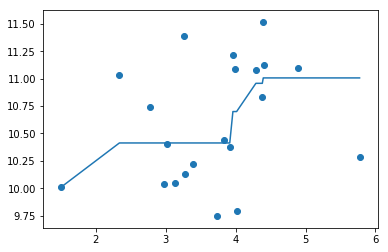

In [57]:
from sklearn.isotonic import IsotonicRegression

iso_model = IsotonicRegression(out_of_bounds='clip')
data2017 = np.array(
    data_2[data_2['t'] == 20]
        .loc[:, ['freq_sum_log10', 'market_log10']]
        .sort_values(by='freq_sum_log10'))
X_2017 = data2017[:, 0]
y_2017 = data2017[:, 1]
iso_model.fit(X_2017, y_2017)
plt.plot(X_2017, iso_model.predict(X_2017))
plt.scatter(X_2017, y_2017)
r2_score(y_2017, iso_model.predict(X_2017))

In [64]:
iso_min_1 = 10**iso_model.predict(X_2017).min()

In [65]:
iso_min_1

10229837223.000011

In [66]:
data_2[data_2.t == 20].sort_values(by='freq_sum_log10')

,name,date,t,freq_sum,market,freq_sum_log10,market_log10
79,Арахисовое масло,2017,20,32,10229837223,1.505150,10.009869
59,Арахис,2017,20,218,108226207717,2.338456,11.034332
139,Соевое масло,2017,20,604,54806206589,2.781037,10.738830
19,Какао,2017,20,942,10870319900,2.974051,10.036242
39,Кокосовое масло,2017,20,1034,25099327340,3.014521,10.399662
199,Сорго,2017,20,1338,11156413313,3.126456,10.047525
179,Маис,2017,20,1834,244073442574,3.263399,11.387521
99,Пальмовое масло,2017,20,1872,13469577625,3.272306,10.129354
159,Ячмень,2017,20,2428,16516909829,3.385249,10.217929
339,Олово,2017,20,5488,5545392160,3.739414,9.743932


## Коррекция выборки

In [67]:
data_2_cut = data_2[data_2.freq_sum_log10 >= 3.73941]
#Почему это число:
#по таблице посмотрела, когда market_log10 в отсортированной версии принимает значения меньше 10,
#потому что с него начинается построение, а не сортировать или сортировать по чему-то другому нельзя в этой модели.

In [68]:
data_2_cut.sort_values(by='freq_sum_log10')

,name,date,t,freq_sum,market,freq_sum_log10,market_log10
339,Олово,2017,20,5488,5545392160,3.739414,9.743932
376,Цинк,2014,17,5665,27150088000,3.753200,10.433771
205,Апельсин,2003,6,5836,53274052780,3.766115,10.726516
116,Соевые бобы,2014,17,5861,157190294002,3.767972,11.196426
410,Платина,2008,11,5880,9500667847,3.769377,9.977754
266,Алюминий,2004,7,5891,60328034000,3.770189,10.780519
336,Олово,2014,17,5898,5826366720,3.770705,9.765398
252,Хлопок,2010,13,5899,125888376000,3.770778,11.099986
226,Говядина,2004,7,5921,201796128620,3.772395,11.304913
350,Никель,2008,11,6103,33051496800,3.785543,10.519191


0.4351557001222428

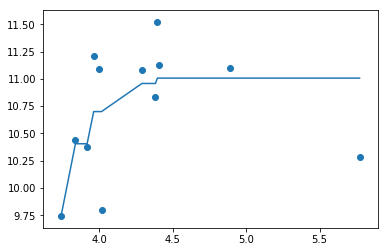

In [69]:
from sklearn.isotonic import IsotonicRegression

iso_model = IsotonicRegression(out_of_bounds='clip')
data2017 = np.array(
    data_2_cut[data_2_cut['t'] == 20]
        .loc[:, ['freq_sum_log10', 'market_log10']]
        .sort_values(by='freq_sum_log10'))
X_2017 = data2017[:, 0]
y_2017 = data2017[:, 1]
iso_model.fit(X_2017, y_2017)
plt.plot(X_2017, iso_model.predict(X_2017))
plt.scatter(X_2017, y_2017)
r2_score(y_2017, iso_model.predict(X_2017))

In [70]:
iso_min_2 = 10**iso_model.predict(X_2017).min()

In [71]:
iso_min_2

5545392159.999995

In [72]:
iso_min_1 - iso_min_2

4684445063.000016

# Alternatives

In [23]:
data_16_17 = data[data['t'] == 20].loc[:,['freq_sum','market']]
data_16_17['freq_sum_t-1'] = data[data['t'] == 19].freq_sum.tolist()

In [24]:
data_16_17

,freq_sum,market,freq_sum_t-1
19,942,10870319900,1123
39,1034,25099327340,973
59,218,108226207717,260
79,32,10229837223,51
99,1872,13469577625,2906
119,9150,163046382909,8723
139,604,54806206589,759
159,2428,16516909829,3598
179,1834,244073442574,2325
199,1338,11156413313,1410


In [28]:
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [29]:
X_2017 = data_16_17.sort_values(by='freq_sum')[['freq_sum', 'freq_sum_t-1']]
y_2017 = data_16_17.sort_values(by='freq_sum')['market']

In [30]:
clf = KNeighborsRegressor(n_neighbors=3, 
                                  metric='minkowski' # default
                                 ).fit(X_2017, y_2017)
Y_pred = clf.predict(X_2017)

In [31]:
r2_score(np.array(y_2017).reshape(-1, 1), Y_pred)

0.40880039265006274

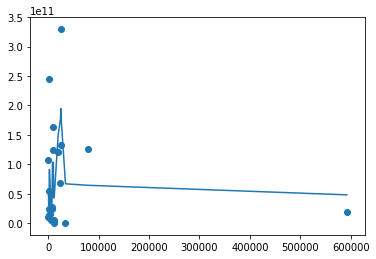

In [33]:
plt.plot(X_2017.freq_sum, Y_pred)
plt.scatter(X_2017.freq_sum, y_2017)

And the same for logged data

In [34]:
data_16_17_l = data[data['t'] == 20].loc[:,['freq_sum_log10','market_log10']]
data_16_17_l['freq_sum_l_t-1'] = data[data['t'] == 19].freq_sum_log10.tolist()

In [35]:
X_2017 = data_16_17_l.sort_values(by='freq_sum_log10')[['freq_sum_log10', 'freq_sum_l_t-1']]
y_2017 = data_16_17_l.sort_values(by='freq_sum_log10')['market_log10']

In [36]:
clf = KNeighborsRegressor(n_neighbors=3, 
                                  metric='minkowski' # default
                                 ).fit(X_2017, y_2017)
Y_pred = clf.predict(X_2017)

In [37]:
r2_score(np.array(y_2017).reshape(-1, 1), Y_pred)

0.416547204370579

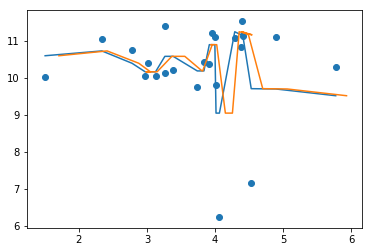

In [40]:
plt.plot(X_2017, Y_pred)
plt.scatter(X_2017.freq_sum_log10, y_2017)

On unlogged data

In [39]:
r2_score(np.array(10**y_2017).reshape(-1, 1), 10**Y_pred)

0.3360799405711351

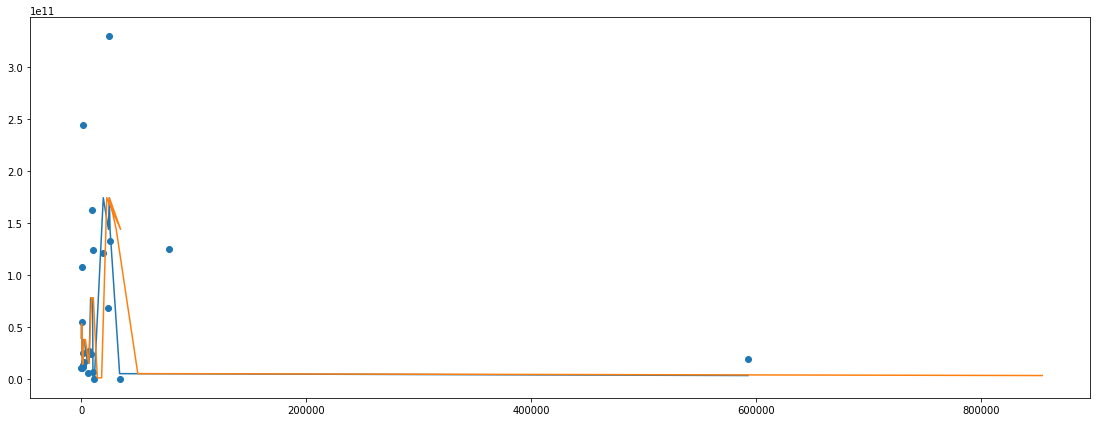

In [43]:
plt.figure(figsize=(19,7))
plt.plot(10**X_2017, 10**Y_pred)
plt.scatter(10**X_2017.freq_sum_log10, 10**y_2017)

In [45]:
data_16_17['name'] = data[data['t'] == 19].name.tolist()

In [46]:
unique_items = data_16_17['name'].unique()

In [47]:
actuals = []
predictions = []
pred_data = []
for item in unique_items:
    working_data = data_16_17[data_16_17['name'] != item]
    Y_real = int(data_16_17[data_16_17['name'] == item].market)
    X_to_pred = data_16_17[data_16_17['name'] == item][['freq_sum', 'freq_sum_t-1']]
    
    X_2017 = working_data[['freq_sum', 'freq_sum_t-1']]
    y_2017 = working_data['market']
    clf = KNeighborsRegressor(n_neighbors=3, 
                                  metric='minkowski' # default
                                 ).fit(X_2017, y_2017)
    Y_pred = clf.predict(X_to_pred)
    predictions.append(int(Y_pred))
    actuals.append(Y_real)
    pred_data.append({"name":item, "actual":Y_real, "preds":int(Y_pred)})

In [48]:
predss = pd.DataFrame(pred_data)
predss

,actual,name,preds
0,10870319900,Какао,30353982414
1,25099327340,Кокосовое масло,25610979934
2,108226207717,Арахис,30045123717
3,10229837223,Арахисовое масло,62710580548
4,13469577625,Пальмовое масло,90582255238
5,163046382909,Соевые бобы,58231299605
6,54806206589,Соевое масло,48065284985
7,16516909829,Ячмень,89566477837
8,244073442574,Маис,13714300255
9,11156413313,Сорго,30258617943


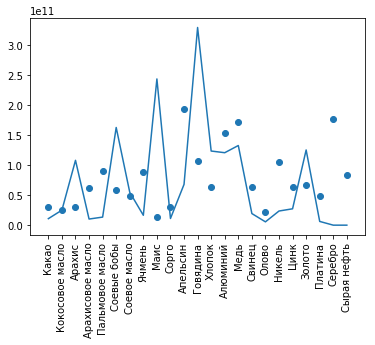

In [52]:
plt.plot(predss.name, predss.actual)
plt.scatter(predss.name, predss.preds)
a = list(range(len(predss.name)))
plt.xticks(a, list(predss.name), rotation='vertical')
plt.show()

In [74]:
predss_min_initial = predss.preds.min()
predss_min_initial

13714300255

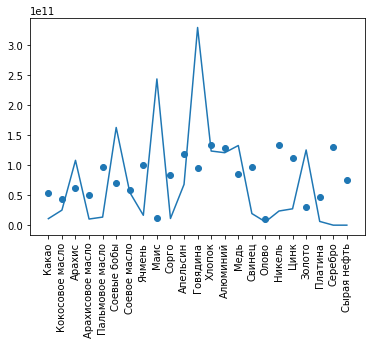

-0.2576314583695434

In [77]:
plt.plot(predss.name, predss.actual)
plt.scatter(predss.name, (np.sin(predss.preds*0.9-1000000)*500000+10)**2**1/2+10000000000)
a = list(range(len(predss.name)))
plt.xticks(a, list(predss.name), rotation='vertical')
plt.show()
r2_score(predss.actual, (np.sin(predss.preds*0.9-1000000)*500000+10)**2**1/2+ 10000000000)

In [78]:
predss_min_sin = ((np.sin(predss.preds*0.9-1000000)*500000+10)**2**1/2+ 10000000000).min()

In [79]:
predss_min_sin

10352579581.777187

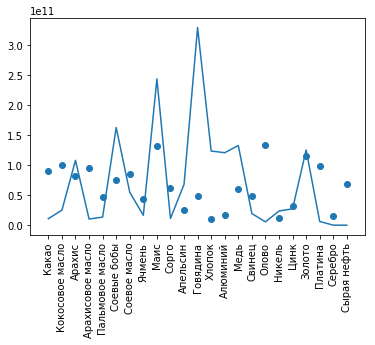

-0.13938290377898688

In [80]:
plt.plot(predss.name, predss.actual)
plt.scatter(predss.name, (np.cos(predss.preds*0.9-1000000)*500000+10)**2**1/2+10000000000)
a = list(range(len(predss.name)))
plt.xticks(a, list(predss.name), rotation='vertical')
plt.show()
r2_score(predss.actual, (np.cos(predss.preds*0.9-1000000)*500000+10)**2**1/2+ 10000000000)

In [81]:
predss_min_cos = ((np.cos(predss.preds*0.9-1000000)*500000+10)**2**1/2+ 10000000000).min()

In [82]:
predss_min_cos

10627209493.244009

## Minimal values on data

In [99]:
mins = [iso_min_1, iso_min_2, predss_min_initial, predss_min_sin, predss_min_cos]


In [100]:
int_mins = []
for min_ in mins:
    int_mins.append(int(min_))
    print(int(min_))

10229837223
5545392159
13714300255
10352579581
10627209493


## Какие цифры вообще может дать kNN

In [89]:
expected_values = []
# freqs = [5, 10, 100, 1000, 5000, 10000, 25000, 50000, 100000, 500000, 1000000]
freqs = []
for power in range(21):
    freqs.append(2**power)

In [90]:
from random import seed
from random import randint
values = [-1, 1, 0]
freqs_prev = np.array(freqs)*0.99999 + np.random.choice(values, p = [0.4, 0.4, 0.2])

In [91]:
preds = []
for i in range(len(freqs_prev)-1):
    X_test = pd.DataFrame([{'freq_sum':freqs[i], 'freq_sum_t-1':freqs_prev[i]}])
    Y_preds = int(clf.predict(X_test))
    Y_preds_m = (np.sin(Y_preds*0.9-1000000)*500000+10)**2**1/2+ 10000000000
    preds.append({'X':int(X_test.freq_sum), 'pred':Y_preds, "modify":Y_preds_m})

In [92]:
preds_df = pd.DataFrame(preds)
preds_df

,X,modify,pred
0,1,1.113607e+11,57754083843
1,2,1.113607e+11,57754083843
2,4,1.113607e+11,57754083843
3,8,1.113607e+11,57754083843
4,16,1.113607e+11,57754083843
5,32,1.113607e+11,57754083843
6,64,1.113607e+11,57754083843
7,128,1.113607e+11,57754083843
8,256,1.113607e+11,57754083843
9,512,1.113607e+11,57754083843


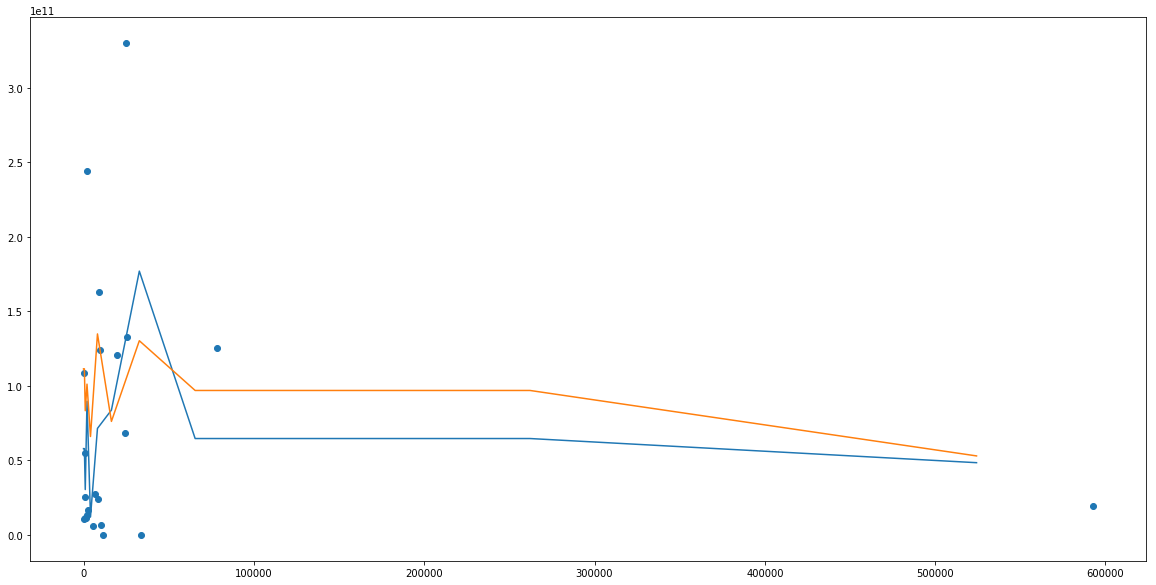

In [93]:
plt.figure(figsize=(20,10))
plt.plot(preds_df.X, preds_df.pred)
plt.plot(preds_df.X, preds_df.modify)
plt.scatter(data_16_17.freq_sum, data_16_17.market)

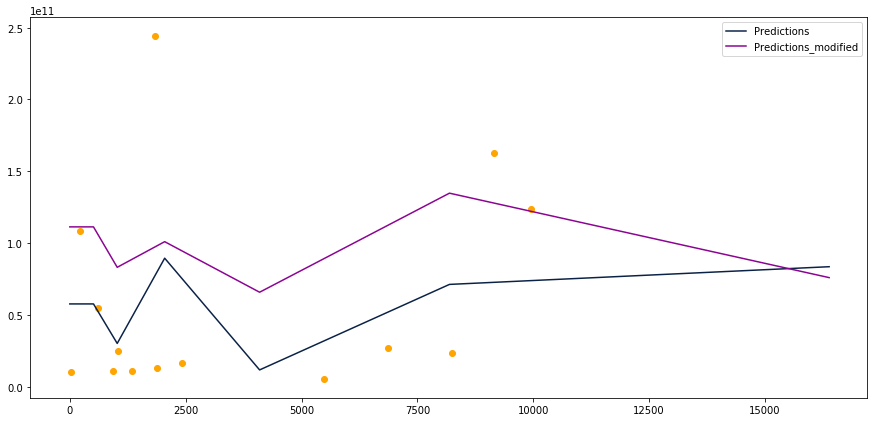

In [107]:
plt.figure(figsize=(15,7))
plt.plot(list(preds_df.X)[:15], list(preds_df.pred)[:15], color = "#0b2247") #darkblue
plt.plot(list(preds_df.X)[:15], list(preds_df.modify)[:15], color = "#8c0492") #pink
plt.scatter(data_16_17[data_16_17['freq_sum']<10000].freq_sum, data_16_17[data_16_17['freq_sum']<10000].market, color = "orange")
plt.legend(['Predictions', 'Predictions_modified'])

In [96]:
preds_df.pred.min()

11843959871

In [97]:
preds_df.modify.min()

52857528097.79836

In [101]:
int_mins.append(int(preds_df.pred.min()))
int_mins.append(int(preds_df.modify.min()))

In [102]:
int_mins

[10229837223,
 5545392159,
 13714300255,
 10352579581,
 10627209493,
 11843959871,
 52857528097]

Lowest: 5545392159 - for iso model on corrected dataset